In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [467]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])

df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0


In [468]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 1 
    else: 
        return 0 

In [469]:
Output = df.apply(pin_update, axis=1)
df['Output'] = Output
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0,0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0,1
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0,1
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0,0


In [470]:
df1 = df[["Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Total Row Score A','Goslon Score A','Total Row Score C','Goslon Score C','Output']]
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Total Row Score A,Goslon Score A,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1
H,9.0,0.0,0.0,0.0,6.0,23,2.0,0,1.0,1
H,9.0,0.0,0.0,0.0,6.0,21,2.0,8,1.0,0
H,0.0,0.0,0.0,0.0,2.0,10,1.0,9,1.0,0
H,9.0,0.0,1.0,0.0,6.0,25,2.0,9,1.0,0
...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,23,2.0,3,1.0,1
Å,9.0,0.0,4.0,0.0,0.0,21,2.0,4,3.0,1
Å,12.0,0.0,0.0,0.0,6.0,25,3.0,12,2.0,0


In [471]:
x = np.array([df["Anteroposterior 1"], df["Anteroposterior 2"],df["Vertical 1"],df["Vertical 2"],df["Total Row Score A"],df["Total Row Score B"]]).T

y = np.array(df["Total Row Score C"]).T


In [472]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [473]:
model = Sequential()
model.add(Dense(12, input_shape=(6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [474]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [475]:
#model.fit(x, y, epochs=150, batch_size=10)

In [476]:
target_column = "Output"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)


In [477]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

In [478]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=0)


In [479]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (92, 37)
y_train: (92,)
X_test: (31, 37)
y_test: (31,)


In [480]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(37,)))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)


In [481]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5543
Epoch 2/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5652
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5978
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6304
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6304
Epoch 6/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.6848
Epoch 7/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6957
Epoch 8/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.7391
Epoch 9/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.7500
Epoch 10/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.7500
Epoch 11/1000
3/3 [=============

In [482]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 [==============================] - 0s 69ms/step - loss: 0.0855 - accuracy: 0.9355
[0.08545796573162079, 0.9354838728904724]
Loss =  0.08545796573162079
Accuracy =  0.9354838728904724


In [483]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(92, 37)
(92,)
(31, 37)
(31,)


In [484]:
predicted = basic_model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


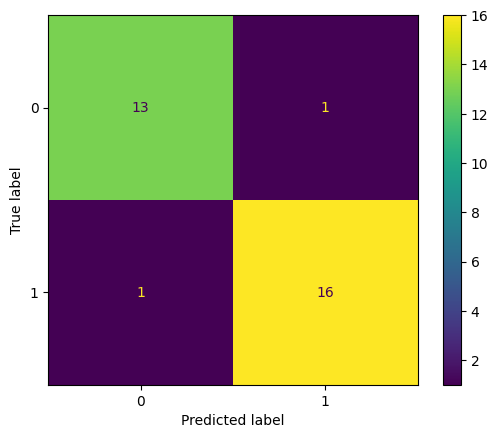

In [485]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [486]:
print(predicted)

[1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0]


In [487]:
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Total Row Score A,Goslon Score A,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1
H,9.0,0.0,0.0,0.0,6.0,23,2.0,0,1.0,1
H,9.0,0.0,0.0,0.0,6.0,21,2.0,8,1.0,0
H,0.0,0.0,0.0,0.0,2.0,10,1.0,9,1.0,0
H,9.0,0.0,1.0,0.0,6.0,25,2.0,9,1.0,0
...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,23,2.0,3,1.0,1
Å,9.0,0.0,4.0,0.0,0.0,21,2.0,4,3.0,1
Å,12.0,0.0,0.0,0.0,6.0,25,3.0,12,2.0,0


In [488]:
target_column = "Output"
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_44793/3048013620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [489]:
scaler = MinMaxScaler()
scaler.fit(df1)
t_df1 = scaler.transform(df1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)


In [490]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)


(92, 9)
(92,)
(31, 9)
(31,)


In [499]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(9,)))
basic_model.add(Dropout(0.2))
basic_model.add(Dense(8, activation='tanh'))
basic_model.add(Dropout(0.2))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)



In [492]:
# earlystop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=20, mode='max')
# basic_model = Sequential()
# basic_model.add(Dense(1012, input_dim=9, activation = 'relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(512, activation='relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(128, activation='relu'))
# basic_model.add(Dropout(0.5))
# basic_model.add(Dense(32, activation='relu'))
# basic_model.add(Dense(1, activation='sigmoid'))
# adam_opt = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# basic_model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy'])


In [500]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train1, y_train1, epochs=50)


Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7973 - accuracy: 0.4348
Epoch 2/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8142 - accuracy: 0.3696
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7714 - accuracy: 0.4457
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.4565
Epoch 5/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.4674
Epoch 6/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.4239
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.4457
Epoch 8/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.4565
Epoch 9/50
3/3 [==============================] - 0s 1ms/step - loss: 0.7649 - accuracy: 0.3587
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5000
Epoch 11/50
3/3 [======================

In [501]:
loss_and_metrics1 = basic_model.evaluate(X_test1, y_test1)
print(loss_and_metrics1)
print('Loss = ',loss_and_metrics1[0])
print('Accuracy = ',loss_and_metrics1[1])

1/1 [==============================] - 0s 62ms/step - loss: 0.5674 - accuracy: 0.8710
[0.5673790574073792, 0.8709677457809448]
Loss =  0.5673790574073792
Accuracy =  0.8709677457809448


In [505]:
predicted = basic_model.predict(X_test1)

1/1 [==============================] - 0s 31ms/step


In [502]:
xnew = np.array([0,0,0,0,0,0,1,1,1])
xnew

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

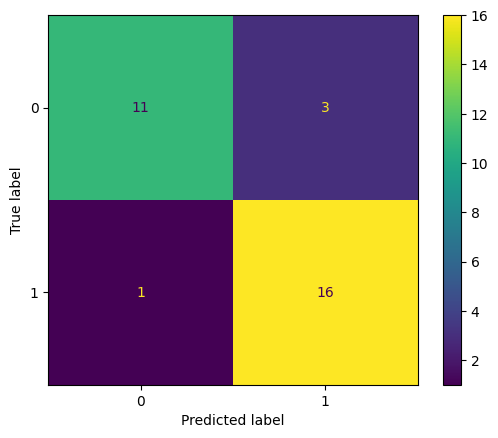

In [506]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [508]:
prediction = basic_model.predict(xnew.reshape(1,9))
prediction

1/1 [==============================] - 0s 13ms/step


array([[0.23591512]], dtype=float32)